In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [26]:
import csv

In [27]:
amazon_csvfile = 'amz_uk_price_prediction_dataset.csv' 

In [28]:
amazon_csvfile = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [37]:
#crosstab between the product category and the isBestSeller status.
contingency_table = pd.crosstab(amazon_csvfile['isBestSeller'], amazon_csvfile['category'])
contingency_table

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


In [38]:
#Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency
import numpy as np

In [41]:
n = contingency_table.sum().sum()
r, k = contingency_table.shape

chi2 = chi2_contingency(contingency_table)[0]
cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
print(cramers_v)


0.1222829439760564


In [78]:
from scipy.stats.contingency import association
cramers_v = association(contingency_table, method="cramer")
print(cramers_v)

0.1222829439760564


In [32]:
import numpy as np

In [44]:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
sorted_contingency_table.iloc[:10]

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


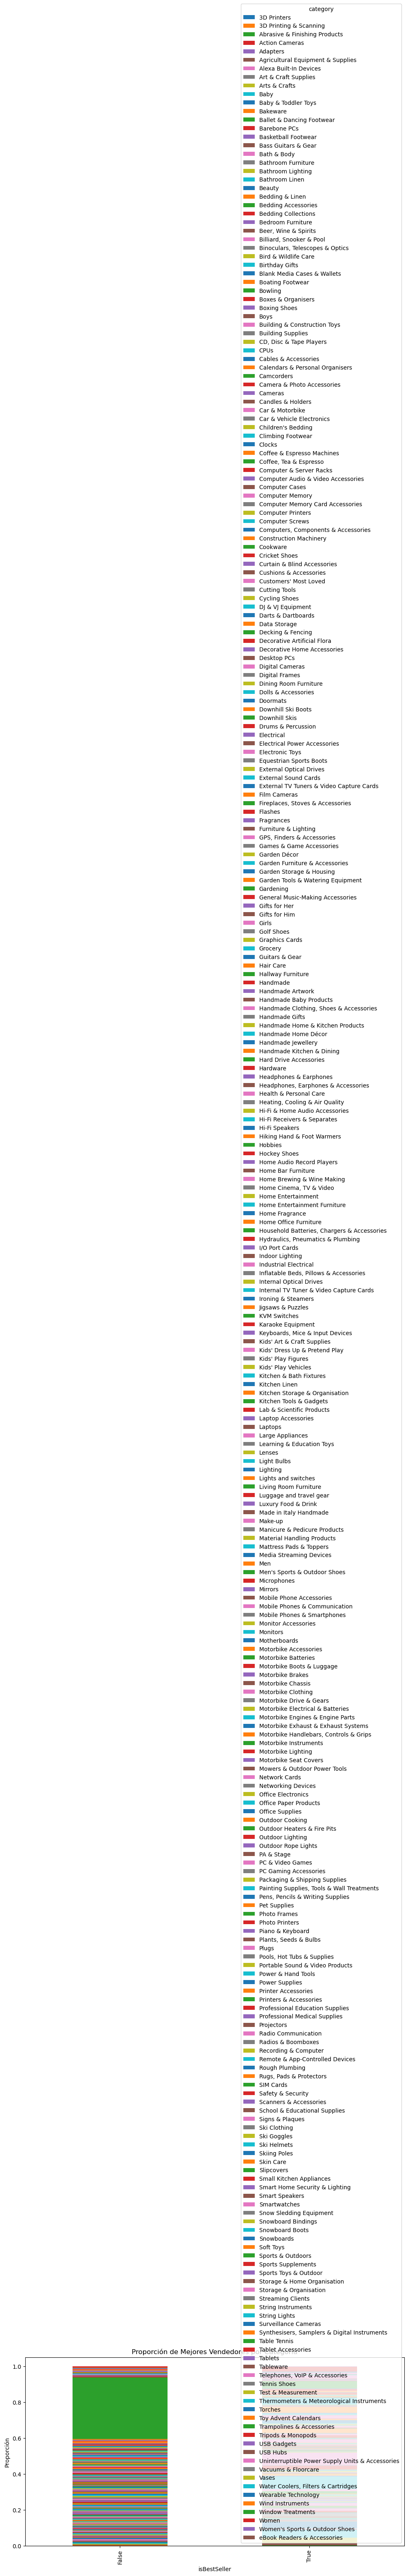

In [79]:
sorted_contingency_table = contingency_table.apply(lambda x: x/x.sum(), axis=1)

# Mostrar sólo las 10 primeras filas de la tabla.
sorted_contingency_table.head(10).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proporción de Mejores Vendedores por Categoría')
plt.xlabel('isBestSeller')
plt.ylabel('Proporción')
plt.show()

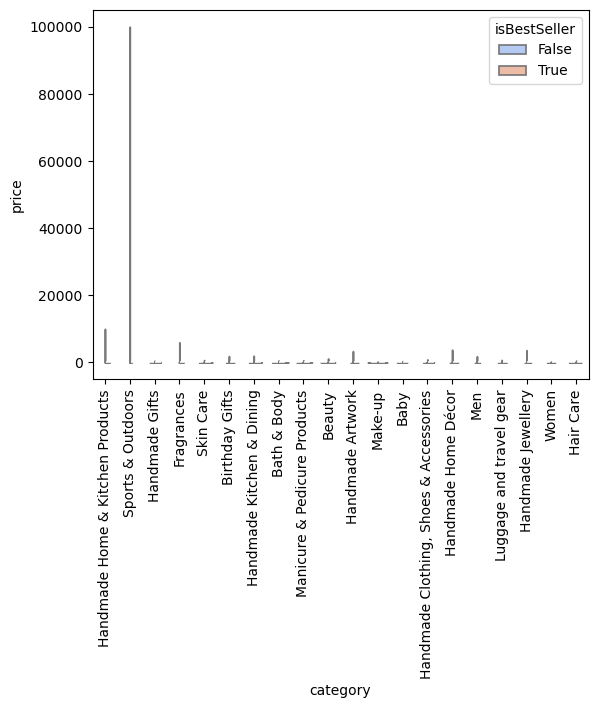

In [80]:
top_categories = amazon_csvfile['category'].value_counts().nlargest(20).index
df_top = amazon_csvfile[amazon_csvfile['category'].isin(top_categories)]
#Visualize the relationship between product categories and the best-seller status using a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
sns.violinplot(data=df_top, x='category', y='price', hue='isBestSeller', palette="coolwarm", split=True)
plt.xticks(rotation=90)
plt.show()

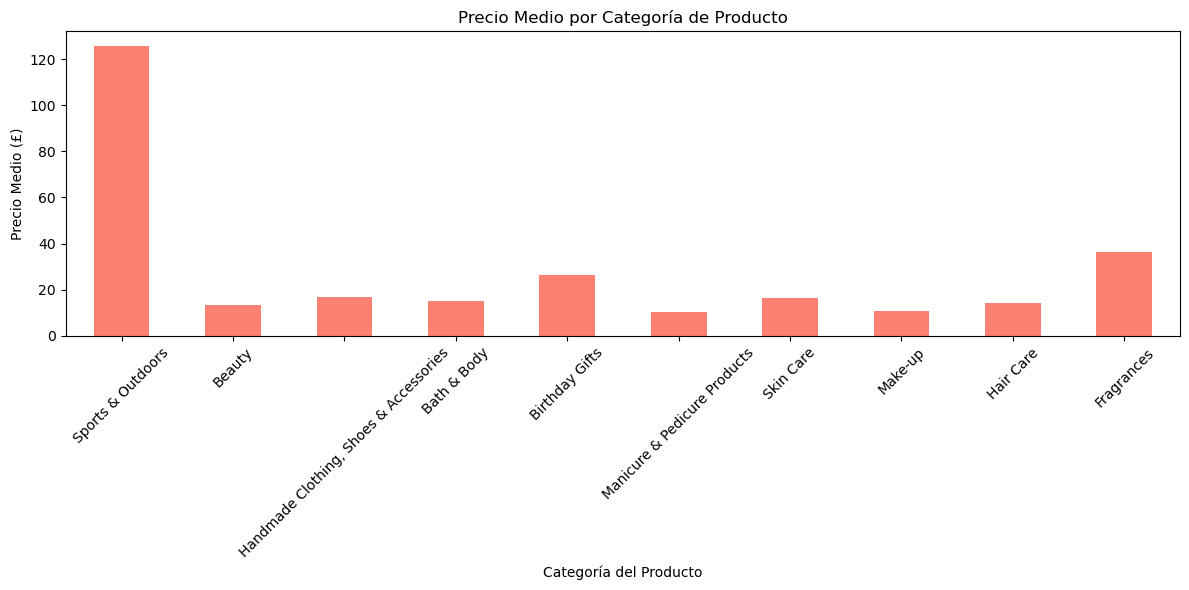

In [81]:
top_categories = amazon_csvfile['category'].value_counts().nlargest(10).index
average_prices = amazon_csvfile.groupby('category')['price'].mean().loc[top_categories]

plt.figure(figsize=(12,6))
average_prices.plot(kind='bar', color='salmon')
plt.title('Precio Medio por Categoría de Producto')
plt.ylabel('Precio Medio (£)')
plt.xlabel('Categoría del Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
#Which product category commands the highest average price? Don't filter here by top categories.
median_price = amazon_csvfile.groupby('category')['price'].median().idxmax()
average_price = amazon_csvfile.groupby('category')['price'].mean().idxmax()

print(f'Categoría con el precio medio más alto: {median_price}')
print(f'Categoría con el precio promedio más alto: {average_price}')

Categoría con el precio medio más alto: Laptops
Categoría con el precio promedio más alto: Laptops


C:\Users\greta\AppData\Local\Temp\ipykernel_22276\1402918249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=amazon_csvfile, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

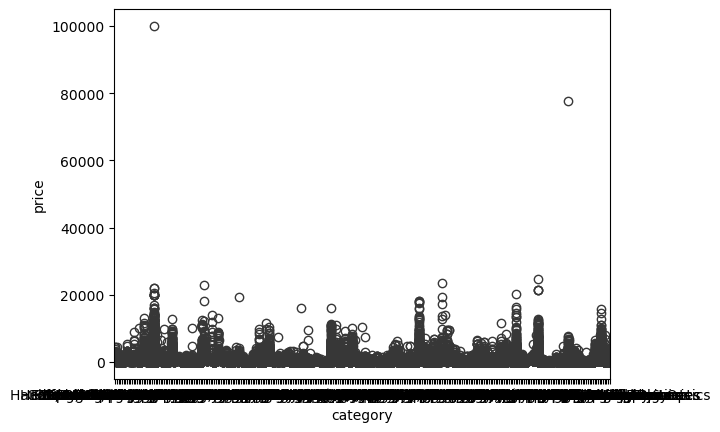

In [83]:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# highest median rating from customers? Don't filter here by top categories.
sns.boxplot(data=amazon_csvfile, x='category', y='price', palette="coolwarm")


In [85]:
#Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
correlation = amazon_csvfile['price'].corr(amazon_csvfile['stars'], method='pearson')
correlation

-0.1249067326214861

In [86]:
#Is there a significant correlation between product price and its rating?
correlation = amazon_csvfile['price'].corr(amazon_csvfile['stars'], method='spearman')
correlation

-0.1331642546243379